In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [382]:
log_dir = r'C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-28_sddpg_simple_HalfCheetah_v2_2L_test\2019-04-28_21-14-22-sddpg_simple_HalfCheetah_v2_2L_test_s3'

log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-29_sddpg_simple2_HalfCheetah_v2_test_q_pi_q_pi_mu_scaled_r\2019-04-29_09-34-05-sddpg_simple2_HalfCheetah_v2_test_q_pi_q_pi_mu_scaled_r_s3"

log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-29_sddpg_simple2_HalfCheetah_v2_test_q_pi_scaled_r\2019-04-29_14-08-04-sddpg_simple2_HalfCheetah_v2_test_q_pi_scaled_r_s3"

log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-30_sddpg_simple2_HalfCheetah_v2_test_q_pi_q_pi_mu_scaled_r_add_tanh_to_sampled_a_no_concentrate\2019-04-30_00-33-58-sddpg_simple2_HalfCheetah_v2_test_q_pi_q_pi_mu_scaled_r_add_tanh_to_sampled_a_no_concentrate_s3"

log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-05-02_sddpg_debug_reconstruct_covariance\2019-05-02_18-01-18-sddpg_debug_reconstruct_covariance_s3"

prog_log_path = "{}\progress.txt".format(log_dir)
prog_df = pd.read_csv(prog_log_path,  sep='\t')

exp_log_path = "{}\experiences_log.txt".format(log_dir)
experiences_df = pd.read_csv(exp_log_path,  sep='\t')

In [383]:
def plot_progress_log_data(prog_df, title=[''], row=1, col=5, figwidth=18, figheight=18):
    """Plot epoch log data"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    
    for d_i in range(len(title)):
        axes.flat[d_i].plot(np.arange(len(prog_df['Epoch'])), prog_df[title[d_i]])
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].set_xlabel('Epoch')
    
    # Invisualize empty axis
    if len(title) < row*col:
        for a_emp in range(len(title), row*col):
            axes.flat[a_emp].axis('off')

    plt.tight_layout()
    
def plot_experience_summary(data, title, row, col, markersize = 0.015):
    """Plot reward, uncertainty, rnd_act_error, and rnd_cri_error"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(18)
    f.set_figheight(3)
    
    for d_i in range(len(data)):
        axes.flat[d_i].plot(np.arange(data[d_i].shape[0]), data[d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    if len(data) < row*col:
        for a_emp in range(len(data), row*col):
            axes.flat[a_emp].axis('off')
    
def plot_explerience(data, row, col, markersize=0.15, figtitle='obs', figname='experience_ob.jpg', 
                     figwidth=18, figheight=18,sharey=False):
    """Plot experience log data"""
    f, axes = plt.subplots(row,col,sharey=sharey)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    for d_i in range(data.shape[1]):
        axes.flat[d_i].plot(np.arange(data.shape[0]), data[:,d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}_{}'.format(figtitle, d_i))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    for a_emp in range(data.shape[1], row*col):
        axes.flat[a_emp].axis('off')
    
    plt.tight_layout()
    plt.savefig(figname, dpi=300)


## Epoch Log

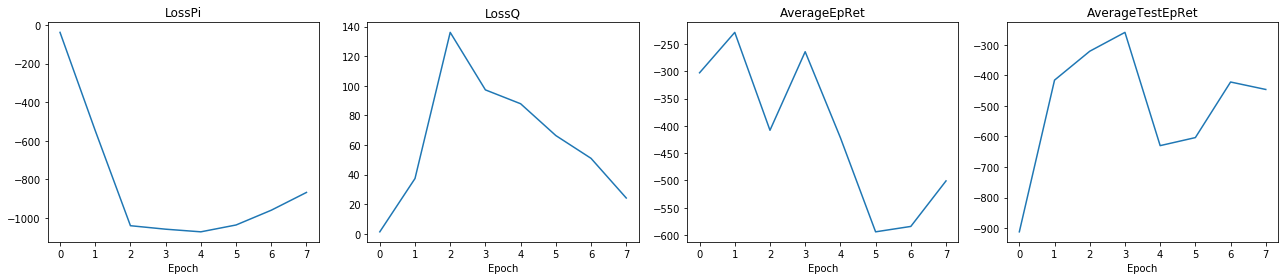

In [384]:
title=['LossPi','LossQ','AverageEpRet','AverageTestEpRet']
plot_progress_log_data(prog_df, title, row=1, col=4, figwidth=18, figheight=4)

## obs

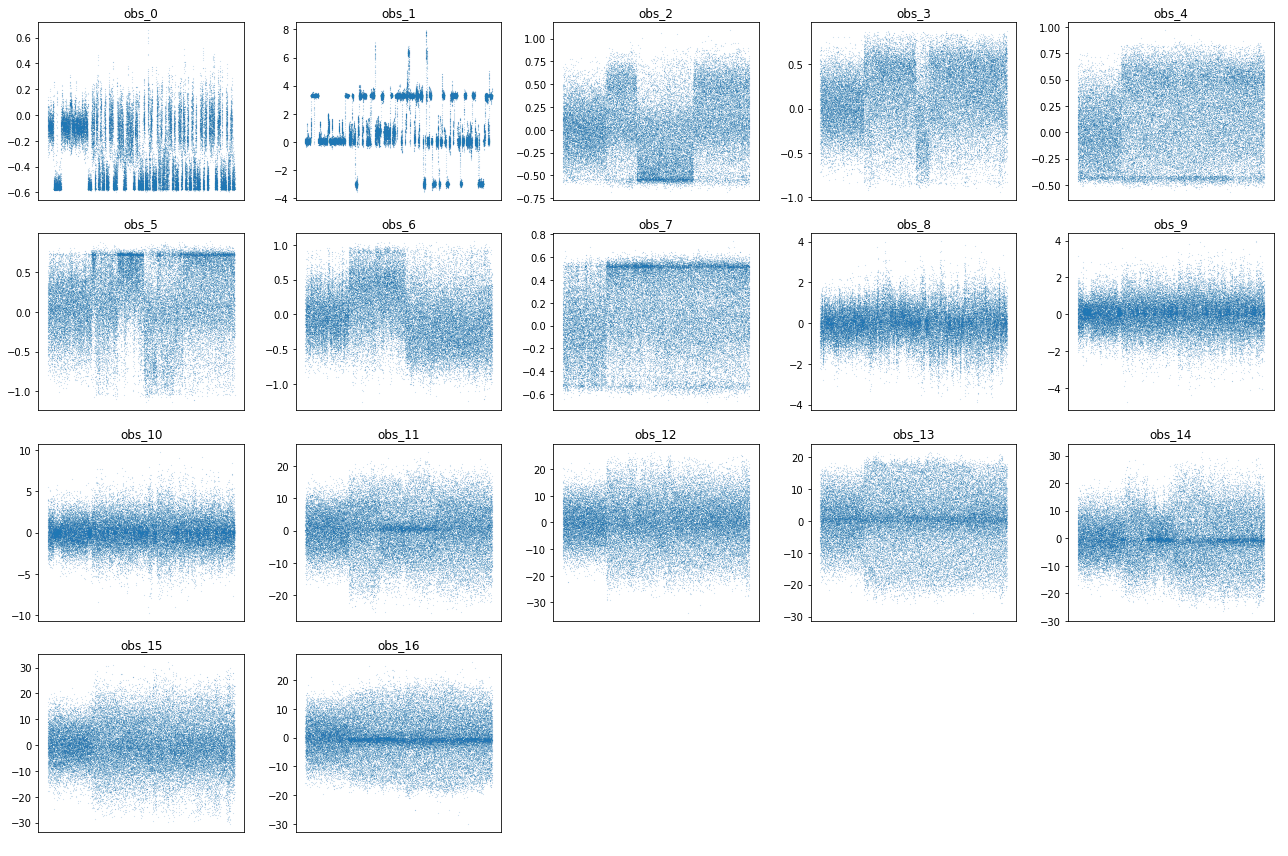

In [385]:
obs_dim = 17
exp_obs = experiences_df[['o_{}'.format(i) for i in range(obs_dim)]].values
plot_explerience(exp_obs, 4, 5, markersize=0.15, figtitle='obs', figname='experience_obs.jpg', 
                 figwidth=18, figheight=12)


## act

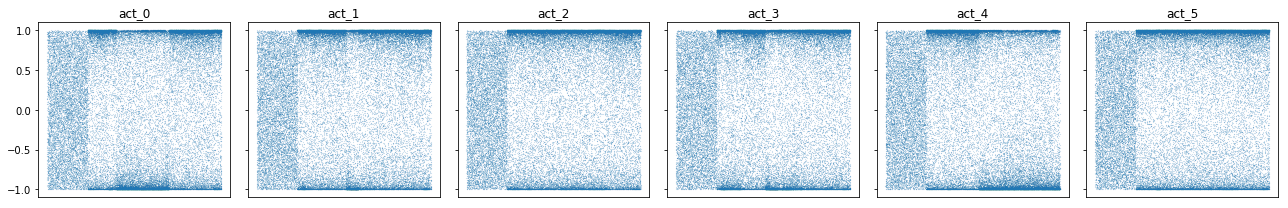

In [386]:
act_dim = 6
exp_act = experiences_df[['a_{}'.format(i) for i in range(act_dim)]].values
plot_explerience(exp_act, 1, 6, markersize=0.15, figtitle='act', figname='experience_act.jpg', 
                 figwidth=18, figheight=3, sharey=True)

## a_mu

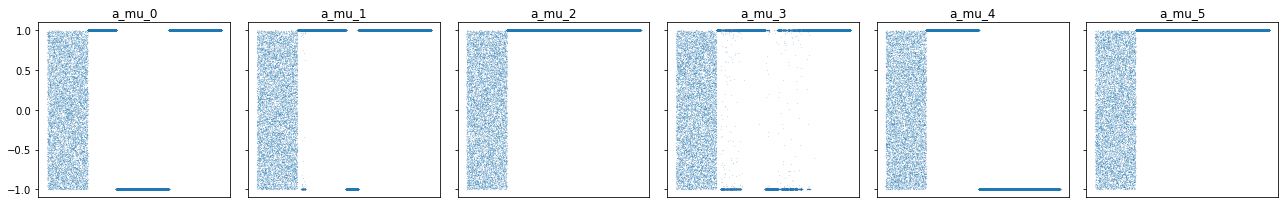

In [387]:
exp_mu = experiences_df[['a_mu_{}'.format(unc_j) for unc_j in range(act_dim)]].values
plot_explerience(exp_mu, 1, act_dim, markersize=0.15, figtitle='a_mu', figname='experience_a_mu.jpg', 
                 figwidth=18, figheight=3, sharey=True)

## a_sigma

In [389]:
['a_sigma_{}'.format(unc_j) for unc_j in range(act_dim)]

['a_sigma_0', 'a_sigma_1', 'a_sigma_2', 'a_sigma_3', 'a_sigma_4', 'a_sigma_5']

In [390]:
experiences_df.columns

Index(['Epoch', 'Step', 'o_0', 'o_1', 'o_2', 'o_3', 'o_4', 'o_5', 'o_6', 'o_7',
       'o_8', 'o_9', 'o_10', 'o_11', 'o_12', 'o_13', 'o_14', 'o_15', 'o_16',
       'a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'a_mu_0', 'a_mu_1', 'a_mu_2',
       'a_mu_3', 'a_mu_4', 'a_mu_5', 'a_alpha_0', 'a_alpha_1', 'a_alpha_2',
       'a_alpha_3', 'a_alpha_4', 'a_alpha_5', 'a_beta_0', 'a_beta_1',
       'a_beta_2', 'a_beta_3', 'a_beta_4', 'a_beta_5', 'a_beta_6', 'a_beta_7',
       'a_beta_8', 'a_beta_9', 'a_beta_10', 'a_beta_11', 'a_beta_12',
       'a_beta_13', 'a_beta_14', 'r', 'o2_0', 'o2_1', 'o2_2', 'o2_3', 'o2_4',
       'o2_5', 'o2_6', 'o2_7', 'o2_8', 'o2_9', 'o2_10', 'o2_11', 'o2_12',
       'o2_13', 'o2_14', 'o2_15', 'o2_16', 'd', 'Time'],
      dtype='object')

In [388]:
exp_sigma = experiences_df[['a_sigma_{}'.format(unc_j) for unc_j in range(act_dim)]].values
plot_explerience(exp_sigma, 1, act_dim, markersize=0.25, figtitle='a_sigma', figname='experience_a_mu.jpg', 
                 figwidth=18, figheight=3, sharey=False)

KeyError: "None of [Index(['a_sigma_0', 'a_sigma_1', 'a_sigma_2', 'a_sigma_3', 'a_sigma_4',\n       'a_sigma_5'],\n      dtype='object')] are in the [columns]"

In [9]:
def generate_weights(act_dim):
    """Generate untrainable weights for creating covariance matrix."""
    k_beta = 0
    w_alpha = np.zeros((act_dim, act_dim**2))
    w_beta = np.zeros((int(act_dim*(act_dim-1)/2), act_dim**2))
    for i in range(act_dim):
        for j in range(act_dim):
            if i == j:
                w_alpha[[i,j], i*act_dim+j] = 1
            else:
                w_alpha[[i,j], i*act_dim+j] = 1/2

            if i != j and i < j:
                w_beta[k_beta, [i*act_dim+j, j*act_dim+i]] = 1
                k_beta += 1
    return w_alpha, w_beta

In [10]:
act_dim = 3
w_alpha, w_beta = generate_weights(act_dim)

In [11]:
alpha = np.random.rand(1,act_dim)
beta = np.random.uniform(-0.9,0.9, (1,int(act_dim*(act_dim-1)/2)))

In [12]:
a = np.reshape(np.exp(np.matmul(alpha,w_alpha)) * np.matmul(beta,w_beta) + np.reshape(np.eye(act_dim),(1,act_dim*act_dim)), (act_dim,act_dim))
np.linalg.cholesky(a)

LinAlgError: Matrix is not positive definite

In [ ]:
np.linalg.cholesky(np.diag([0,1,0.5]))

In [ ]:
a_alpha = [0,1,0.5, 0.2, 3]
np.diag(np.exp(a_alpha))

In [13]:
sigma = [0.1, 0.3, 0.5]
rho = [-1, 0.2, -0.3]

In [17]:
cov_mat = [[sigma[0]**2, sigma[0]*sigma[1]*rho[0], sigma[0]*sigma[2]*rho[1]], 
           [sigma[1]*sigma[0]*rho[0], sigma[1]**2, sigma[1]*sigma[2]*rho[2]], 
           [sigma[2]*sigma[0]*rho[1], sigma[2]*sigma[1]*rho[2], sigma[2]**2]]
cov_mat = np.array(cov_mat)

In [18]:
cov_mat

array([[ 0.01 , -0.03 ,  0.01 ],
       [-0.03 ,  0.09 , -0.045],
       [ 0.01 , -0.045,  0.25 ]])

In [19]:
np.linalg.cholesky(cov_mat)

LinAlgError: Matrix is not positive definite

In [20]:
alpha = [0.1, 0.3, 0.5]
beta = [-1, 0.2, -0.3]

In [23]:
sigma = np.array([np.exp(alpha[0]), np.exp(alpha[1]), np.exp(alpha[2])])
sigma

array([1.10517092, 1.34985881, 1.64872127])

In [25]:
rho = np.array([(np.exp(2*beta[0])-1)/(np.exp(2*beta[0])+1), 
                (np.exp(2*beta[1])-1)/(np.exp(2*beta[1])+1), 
                (np.exp(2*beta[2])-1)/(np.exp(2*beta[2])+1)])
rho

array([-0.76159416,  0.19737532, -0.29131261])

In [28]:
cov_mat = np.array([[sigma[0]**2, rho[0]*sigma[0]*sigma[1], rho[1]*sigma[0]*sigma[2]], 
                    [rho[0]*sigma[0]*sigma[1], sigma[1]**2, rho[2]*sigma[1]*sigma[2]], 
                    [rho[1]*sigma[0]*sigma[2], rho[2]*sigma[1]*sigma[2], sigma[2]**2]])
cov_mat

array([[ 1.22140276, -1.13616497,  0.35964128],
       [-1.13616497,  1.8221188 , -0.64832814],
       [ 0.35964128, -0.64832814,  2.71828183]])

In [27]:
np.linalg.cholesky(cov_mat)

array([[ 1.10517092,  0.        ,  0.        ],
       [-1.02804458,  0.87478177,  0.        ],
       [ 0.32541689, -0.35870098,  1.57598201]])

In [71]:
def generate_weights(act_dim):
    """Generate untrainable weights for creating covariance matrix."""
    k_beta = 0
    w_alpha = np.zeros((act_dim, act_dim**2))
    w_beta = np.zeros((int(act_dim*(act_dim-1)/2), act_dim**2))
    for i in range(act_dim):
        for j in range(act_dim):
            if i == j:
                w_alpha[[i,j], i*act_dim+j] = 2
            else:
                w_alpha[[i,j], i*act_dim+j] = 1

            if i != j and i < j:
                w_beta[k_beta, [i*act_dim+j, j*act_dim+i]] = 1
                k_beta += 1
    return w_alpha, w_beta

In [115]:
act_dim = 3
w_alpha, w_beta = generate_weights(act_dim)

In [116]:
alpha = np.random.rand(1,act_dim)
beta = np.random.uniform(-0.9,0.9, (1,int(act_dim*(act_dim-1)/2)))

In [87]:
np.matmul(beta,w_beta) + np.reshape(np.eye(act_dim),(1,act_dim*act_dim))

array([[ 1.        ,  0.37940097,  0.19292617,  0.37940097,  1.        ,
        -0.8188585 ,  0.19292617, -0.8188585 ,  1.        ]])

In [117]:
sigma_i_j = np.exp(np.matmul(alpha,w_alpha))
beta_i_j = np.matmul(beta,w_beta) + np.reshape(np.eye(act_dim),(1,act_dim*act_dim))
beta_i_j

array([[ 1.        , -0.09145565, -0.66625837, -0.09145565,  1.        ,
         0.85289068, -0.66625837,  0.85289068,  1.        ]])

In [118]:
a = np.reshape(sigma_i_j * beta_i_j, (act_dim,act_dim))
np.linalg.cholesky(a)

LinAlgError: Matrix is not positive definite

In [92]:
alpha

array([[0.01802279, 0.23253255, 0.01562339, 0.43767829, 0.44814108,
        0.10078919]])

In [82]:
beta

array([[0.45774363, 0.59269376, 0.81959498]])

In [216]:
act_dim = 3
w_alpha, w_beta = generate_weights(act_dim)
alpha = np.random.rand(1,act_dim)
beta = np.random.uniform(-0.9,0.9, (1,int(act_dim*(act_dim-1)/2)))
rho = (np.exp(2*np.matmul(beta,w_beta)) -1) / (np.exp(2*np.matmul(beta,w_beta)) + 1)+ np.reshape(np.eye(act_dim),(1,act_dim*act_dim))
rho

array([[ 1.        , -0.50639868, -0.57428608, -0.50639868,  1.        ,
        -0.43561668, -0.57428608, -0.43561668,  1.        ]])

In [217]:
a = np.reshape(rho * np.exp(np.matmul(alpha,w_alpha)), (act_dim,act_dim))
np.linalg.cholesky(a)

LinAlgError: Matrix is not positive definite

In [119]:
np.matmul(beta,w_beta)

array([[ 0.        , -0.09145565, -0.66625837, -0.09145565,  0.        ,
         0.85289068, -0.66625837,  0.85289068,  0.        ]])

In [225]:
A_vecl = np.array([0.1, 0.3, 0.5, -0.3, -0.2, 0.25])
A = np.array([[1, A_vecl[0], A_vecl[1], A_vecl[2]], 
              [A_vecl[0], 1, A_vecl[3], A_vecl[4]], 
              [A_vecl[1], A_vecl[3], 1, A_vecl[5]],
              [A_vecl[2], A_vecl[4], A_vecl[5], 1]])

In [226]:
from scipy.linalg import expm
C = expm(A)
np.linalg.cholesky(C)

array([[ 1.79761322e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.05234428e-05,  1.70633664e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 5.75612440e-01, -5.24616221e-01,  1.57960614e+00,
         0.00000000e+00],
       [ 8.62991672e-01, -3.75269008e-01,  2.14523813e-01,
         1.52503279e+00]])

In [377]:
def generate_weights(act_dim):
    """Generate untrainable weights for creating covariance matrix."""
    k_beta = 0
    w_beta = np.zeros((int(act_dim*(act_dim-1)/2), act_dim**2))
    for i in range(act_dim):
        for j in range(act_dim):
            if i != j and i < j:
                w_beta[k_beta, [i*act_dim+j, j*act_dim+i]] = 1
                k_beta += 1
    return w_beta

In [459]:
for i in range(100):
    act_dim = 6
    batch_dim = 1
    w_rho = generate_weights(act_dim)
    sigma = np.random.uniform(0.00001,0.9999,(batch_dim, act_dim))
    rho = np.random.uniform(-15, 15, (batch_dim, int(act_dim*(act_dim-1)/2)))
    x_old = np.ones(sigma.shape[1])
    x_new = np.ones(sigma.shape[1])

    A = np.matmul(rho, w_rho)
    A[:, [i*(act_dim+1) for i in range(act_dim)]] = x_old
    A = A.reshape([act_dim, act_dim])

    while np.array_equal(x_old, x_new):
        x_old = x_new
        np.fill_diagonal(A,x_old)
        x_new = x_old-np.log(np.diag(expm(A)))

    C = expm(A)
    np.fill_diagonal(C , 1)
    
    S = np.zeros(C.shape)
    for i in range(act_dim):
        for j in range(act_dim):
            S[i,j] = C[i,j]*sigma[0,i]*sigma[0,j]
    # S = 
    # print(C)
    np.linalg.cholesky(C)
    if np.all(np.linalg.eigvals(C) > 0):
        print('C is positive definite matrix.')
    if np.all(np.linalg.eigvals(S) > 0):
        print('S is positive definite matrix.')

C is positive definite matrix.


LinAlgError: Matrix is not positive definite

In [410]:
C

array([[ 8.99331748,  6.70021584, -4.75872926, -3.24900258, -4.17623062,
         5.32125309],
       [ 6.70021584,  8.9517069 , -5.89534218,  0.80959352, -2.27976093,
         5.46430757],
       [-4.75872926, -5.89534218,  6.39985402, -0.69138042,  0.10830841,
        -4.55124919],
       [-3.24900258,  0.80959352, -0.69138042,  5.5488867 ,  3.36152291,
        -0.98766535],
       [-4.17623062, -2.27976093,  0.10830841,  3.36152291,  5.29500992,
        -1.03248938],
       [ 5.32125309,  5.46430757, -4.55124919, -0.98766535, -1.03248938,
         6.15748678]])

In [381]:
from scipy.linalg import expm

while True:
    x_new = x_old-np.log(np.diag(expm(A)))
#     print('x_old={}'.format(x_old))
#     print('x_new={}'.format(x_new))
#     print(np.array_equal(x_old, x_new))
    x_old = np.around(x_old, 10)
    x_new = np.around(x_new, 10)
#     import pdb; pdb.set_trace()
    if np.array_equal(x_old, x_new):
        break
    else:
        np.fill_diagonal(A,x_new)
        x_old = x_new
#         print(A)
C = expm(A)
np.fill_diagonal(C , 1)
S = np.zeros(C.shape)
for i in range(act_dim):
    for j in range(act_dim):
        S[i,j] = C[i,j]*sigma[0,i]*sigma[0,j]
# S = 
# print(C)
# np.linalg.cholesky(C)
if np.all(np.linalg.eigvals(C) > 0):
    print('C is positive definite matrix.')
if np.all(np.linalg.eigvals(S) > 0):
    print('S is positive definite matrix.')

C is positive definite matrix.
S is positive definite matrix.


https://9b31dea8-a-62cb3a1a-s-sites.googlegroups.com/site/peterreinhardhansen/research-papers/anewparametrizationofcorrelationmatrices/CorNoteWebAppendix.pdf?attachauth=ANoY7cpViIV6TjrCyeYORXb0j6rKMGBdlqJYZntniOoUfiKAJVhdKDut_8V2z53pJp674EhZ1GA2ocpP967a2gIilyhfoHSghe5kOYn8QFAJ9eZZBjYtu6DzKNiwWO-QuHmH_4ES7wUeZObxZ7_sjvr_msVxMgqwjCkxMyf4lQw1lTjo9zktCF237a8PWq_h5Tlzb-7K5a8li2k_Pjujo7wiiqGh0ZWA4fLgle_6VYn4xlaRYTxiTMDxTREZipv4eyOkLOaBaa07_1PFoS8zxzhGkxj25-sz2LO7pxPhfmWs3cdx0LekUvVL59ClOxLLeBhIfN9WHMuQ&attredirects=0

In [3]:
#
import numpy as np
from scipy . linalg import expm , norm
def GFT_inverse_mapping ( gamma_in , tol_value):
    C = []
    iter_number = -1
    try :
        # Check if input is of proper format : gamma is of suitable length
        # and tolerance value belongs to a proper interval
        n = 0.5*(1+ np.sqrt (1+8* len ( gamma_in )))
        if not all ([ gamma_in.ndim == 1 , n.is_integer () , 0 < tol_value < 1]):
            raise ValueError
        
        # Place elements from gamma into off - diagonal parts
        # and put zeros on the main diagonal of nxn symmetric matrix A
        n = int(n)
        A = np.zeros ( shape =( n , n ))
        A [ np.triu_indices (n ,1)] = gamma_in
        A = A + A.T
        
        # Read properties of the input matrix
        diag_vec = np.diag ( A )
        diag_ind = np.diag_indices_from ( A )
        
        # Iterative algorithm to get the proper diagonal vector
        dist = np.sqrt (n)
        while dist > np.sqrt ( n )* tol_value :
            diag_delta = np.log ( np . diag ( expm ( A )))
            diag_vec = diag_vec - diag_delta
            A [ diag_ind ] = diag_vec
            dist = norm ( diag_delta )
            iter_number += 1
        
        # Get a unique reciprocal correlation matrix
        C = expm (A)
        np.fill_diagonal(C , 1)
    except ValueError :
        print (" Error : input is of wrong format ")
    
    return C , iter_number

In [132]:
act_dim = 6
sigma = np.random.uniform(0.00001,0.9999,(1, act_dim))
gamma_in = np.random.uniform(-5, 5, (int(act_dim*(act_dim-1)/2,)))
C, iter_number = GFT_inverse_mapping (gamma_in , tol_value=1e-4)
C

array([[ 1.        ,  0.9230006 ,  0.15143367,  0.47584389,  0.6261597 ,
        -0.81800669],
       [ 0.9230006 ,  1.        , -0.20555397,  0.11329607,  0.41153659,
        -0.6084373 ],
       [ 0.15143367, -0.20555397,  1.        ,  0.93027153,  0.75100929,
        -0.64410955],
       [ 0.47584389,  0.11329607,  0.93027153,  1.        ,  0.81700277,
        -0.81359884],
       [ 0.6261597 ,  0.41153659,  0.75100929,  0.81700277,  1.        ,
        -0.9565983 ],
       [-0.81800669, -0.6084373 , -0.64410955, -0.81359884, -0.9565983 ,
         1.        ]])

In [133]:
C, iter_number = GFT_inverse_mapping (gamma_in , tol_value=1e-10)
C

array([[ 1.        ,  0.92301493,  0.1514084 ,  0.47586032,  0.62614852,
        -0.81793963],
       [ 0.92301493,  1.        , -0.20557975,  0.113282  ,  0.4115173 ,
        -0.60837313],
       [ 0.1514084 , -0.20557975,  1.        ,  0.93026795,  0.75102222,
        -0.64404016],
       [ 0.47586032,  0.113282  ,  0.93026795,  1.        ,  0.8170289 ,
        -0.81354629],
       [ 0.62614852,  0.4115173 ,  0.75102222,  0.8170289 ,  1.        ,
        -0.95656066],
       [-0.81793963, -0.60837313, -0.64404016, -0.81354629, -0.95656066,
         1.        ]])

In [194]:
import time
start_t = time.time()
for test_i in range(100):
    act_dim = 6
    sigma = np.random.uniform(0.00001,0.9999,(1, act_dim))
    gamma_in = np.random.uniform(-0.1, 0.1, (int(act_dim*(act_dim-1)/2,)))
#     gamma_in = 4.5*np.ones((int(act_dim*(act_dim-1)/2,)))
    tol_value=1e-4
    C, iter_number = GFT_inverse_mapping (gamma_in , tol_value)
    
    C = C + np.sqrt(act_dim)*tol_value*np.eye(C.shape[0])
    
    S = np.zeros(C.shape)
    for i in range(act_dim):
        for j in range(act_dim):
            S[i,j] = C[i,j]*sigma[0,i]*sigma[0,j]
#     np.linalg.cholesky(C)
            #     print(C)
#     C_ = nearPSD(C, epsilon=1e-15)
#     C_ = nearest_correlation_matrix(C, threshold=1e-15)
#     C_ = nearest_correlation_matrix_simple(C)
#     np.linalg.cholesky(C_)
    print('i={}, iter_num={}'.format(test_i,iter_number))
#     print('  iter_number={}'.format(iter_number))
#     if np.all(np.linalg.eigvals(C) > 0):
#         print('  C is positive definite matrix.')
#     if np.all(np.linalg.eigvals(S) > 0):
#         print('  S is positive definite matrix.')
end_t = time.time()-start_t
print('Spent time: {}'.format(end_t))

i=0, iter_num=1
i=1, iter_num=1
i=2, iter_num=1
i=3, iter_num=1
i=4, iter_num=1
i=5, iter_num=1
i=6, iter_num=1
i=7, iter_num=1
i=8, iter_num=1
i=9, iter_num=1
i=10, iter_num=1
i=11, iter_num=1
i=12, iter_num=1
i=13, iter_num=1
i=14, iter_num=1
i=15, iter_num=1
i=16, iter_num=1
i=17, iter_num=1
i=18, iter_num=1
i=19, iter_num=1
i=20, iter_num=1
i=21, iter_num=1
i=22, iter_num=1
i=23, iter_num=1
i=24, iter_num=1
i=25, iter_num=1
i=26, iter_num=1
i=27, iter_num=1
i=28, iter_num=1
i=29, iter_num=1
i=30, iter_num=1
i=31, iter_num=1
i=32, iter_num=1
i=33, iter_num=1
i=34, iter_num=1
i=35, iter_num=1
i=36, iter_num=1
i=37, iter_num=1
i=38, iter_num=1
i=39, iter_num=1
i=40, iter_num=1
i=41, iter_num=1
i=42, iter_num=1
i=43, iter_num=1
i=44, iter_num=1
i=45, iter_num=1
i=46, iter_num=1
i=47, iter_num=1
i=48, iter_num=1
i=49, iter_num=1
i=50, iter_num=1
i=51, iter_num=1
i=52, iter_num=1
i=53, iter_num=1
i=54, iter_num=1
i=55, iter_num=1
i=56, iter_num=1
i=57, iter_num=1
i=58, iter_num=1
i=59, i

In [181]:
C
print(np.linalg.eigvals(C))
# np.linalg.cholesky(C)

[ 4.90288020e+00  1.05000940e+00  3.36267942e-02  1.05213960e-02
 -8.57608580e-06  2.97078178e-03]


In [182]:
C

array([[ 1.        , -0.99322774,  0.97473817, -0.88663764, -0.43768589,
         0.96303568],
       [-0.99322774,  1.        , -0.97593982,  0.89991036,  0.41124297,
        -0.94780111],
       [ 0.97473817, -0.97593982,  1.        , -0.88956999, -0.44929511,
         0.9576579 ],
       [-0.88663764,  0.89991036, -0.88956999,  1.        ,  0.003415  ,
        -0.74954988],
       [-0.43768589,  0.41124297, -0.44929511,  0.003415  ,  1.        ,
        -0.65372947],
       [ 0.96303568, -0.94780111,  0.9576579 , -0.74954988, -0.65372947,
         1.        ]])

In [185]:
print(np.linalg.eigvals(C))

[ 4.90288020e+00  1.05000940e+00  3.36267942e-02  1.05213960e-02
 -8.57608580e-06  2.97078178e-03]


In [187]:
def nearest_correlation_matrix_simple(corr):
    k = min(np.linalg.eigvals(corr))
    corr_new = corr - 2*k*np.eye(corr.shape[0])
    return corr_new
# Anew = A/A(1,1)
C_ = nearest_correlation_matrix_simple(C)
print(np.linalg.eigvals(C_))
# min(np.linalg.eigvals(corr))

[4.90289736e+00 1.05002655e+00 3.36439463e-02 1.05385482e-02
 8.57608580e-06 2.98793396e-03]


http://www.statsmodels.org/dev/_modules/statsmodels/stats/correlation_tools.html#cov_nearest

In [137]:
def nearest_correlation_matrix(corr, threshold=1e-15):
    """Find the nearest correlation matrix that is positive (semi-)definite."""
    evals, evecs = np.linalg.eigh(corr)
    clipped = np.any(evals<0)
    if not clipped:
        return corr
    else:
        corr_new = np.dot(evecs * np.maximum(evals, threshold), evecs.T)
        return corr_new

In [128]:
print(np.linalg.eigvals(C))
np.linalg.cholesky(C)

[ 4.90751846e+00  1.09126977e+00  1.21176727e-03  5.80422424e-11
 -1.00970237e-10 -2.13793609e-11]


LinAlgError: Matrix is not positive definite

In [129]:
C_ = nearest_correlation_matrix(C, threshold=1e-15)
print(np.linalg.eigvals(C_))
np.linalg.cholesky(C_)

> <ipython-input-127-6094f6860543>(9)nearest_correlation_matrix()
-> corr_new = np.dot(evecs * np.maximum(evals, threshold), evecs.T)
(Pdb) evecs
array([[ 0.31572073,  0.13008724,  0.5475609 ,  0.13776982,  0.68118322,
        -0.31714931],
       [ 0.04040403,  0.41481054, -0.51162268,  0.48229472,  0.40606383,
         0.40871254],
       [ 0.74725019, -0.48638761, -0.00479423,  0.00216501, -0.04005445,
         0.45101243],
       [-0.04433387, -0.46749216, -0.14803268,  0.73563715, -0.12816971,
        -0.44719394],
       [-0.57184544, -0.54384847,  0.15474266, -0.02864145,  0.4372698 ,
         0.40156087],
       [-0.10645366,  0.24518678,  0.62652801,  0.45433934, -0.40232434,
         0.40954195]])
(Pdb) evecs.shape
(6, 6)
(Pdb) evals
array([-1.00968381e-10, -2.13798869e-11,  5.80406097e-11,  1.21176727e-03,
        1.09126977e+00,  4.90751846e+00])
(Pdb) np.maximum(evals, threshold)
array([1.00000000e-15, 1.00000000e-15, 5.80406097e-11, 1.21176727e-03,
       1.09126977e+00, 

BdbQuit: 

https://stackoverflow.com/questions/10939213/how-can-i-calculate-the-nearest-positive-semi-definite-matrix

In [78]:
def nearPSD(A,epsilon=0):
   n = A.shape[0]
   eigval, eigvec = np.linalg.eig(A)
   val = np.matrix(np.maximum(eigval,epsilon))
   vec = np.matrix(eigvec)
   T = 1/(np.multiply(vec,vec) * val.T)
   T = np.matrix(np.sqrt(np.diag(np.array(T).reshape((n)) )))
   B = T * vec * np.diag(np.array(np.sqrt(val)).reshape((n)))
   out = B*B.T
   return(out)

In [125]:
print(np.linalg.eigvals(C))
np.linalg.cholesky(C)

[ 4.90751846e+00  1.09126977e+00  1.21176727e-03  5.80422424e-11
 -1.00970237e-10 -2.13793609e-11]


LinAlgError: Matrix is not positive definite

In [80]:
C_ = nearPSD(C,epsilon=0)
print(np.linalg.eigvals(C_))
np.linalg.cholesky(C_)

[4.30751387e+00 1.69247898e+00 7.11661298e-06 3.15520322e-08
 2.13019562e-11 1.39185484e-16]


matrix([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-5.82097888e-01,  8.13118717e-01,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.56586766e-03,  9.99992970e-01,  1.15968910e-03,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.10755473e-01, -9.77538762e-01, -2.62241448e-04,
          1.75134488e-04,  0.00000000e+00,  0.00000000e+00],
        [ 8.87184292e-01, -4.61404501e-01,  3.09631223e-03,
          5.75967364e-04,  1.03667778e-05,  0.00000000e+00],
        [-7.06187486e-02, -9.97502933e-01, -9.35647156e-04,
         -1.24487888e-04,  4.41487453e-06,  1.13368748e-08]])

[ 4.30751387e+00  1.69247898e+00  7.11661298e-06  3.15520322e-08
  2.13019440e-11 -2.65910339e-11]


In [478]:
k = min(np.linalg.eigvals(C))
A = C - k*np.eye(C.shape[0])
A == C
Anew = A/A[1,1]
Anew == C

array([[ True, False, False, False, False, False],
       [False,  True, False, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False,  True, False, False],
       [False, False, False, False,  True, False],
       [False, False, False, False, False,  True]])

In [479]:
np.linalg.eigvals(Anew)

array([ 5.90995217e+00,  8.90359908e-02,  1.01165465e-03,  1.84819547e-07,
        1.22372041e-09, -1.05873872e-16])

In [ ]:
k = min(eig(A0));
A = A0 - k*eye(size(A0));
Anew = A/A(1,1)